In [ ]:
# 머신 러닝
# input, Label을 활용하여 규칙을 찾게 하는 과정
# 지도 학습 : Label이 있다
# - K-NN, Decision Tree, Support Vector Machine
# 비지도 학습 : Label이 없다
# 강화 학습 : 보상(reward)을 통해 학습

In [32]:
# 비지도 학습 (Unsupervised Learning)
# - Label이 없다
# 군집, 차원 축소, 이상 탐지

In [33]:
# 군집 알고리즘 (Clustrering)
# - K-Means Clustering
# 핵심 개념 : 사용자가 지정한 K개의 군집을 설정하기 위해
# 중심점을 설정하고, 각 데이터 포인터를 가장 가까운 중심점에 할당

# 순서
# 1) K개의 중심점을 설정
# 2) 할당 : 모든 데이터를 가장 가까운 중심점에 할당
# 3) 이동 : 각 군집의 중심점을 해당 군집에 속한 데이터들의 평균 위치로 이동

In [52]:
# 1) 임의의 데이터
from sklearn.datasets import make_blobs # 군집용 데이터 생성
from sklearn.cluster import KMeans      # 군집 알고리즘

# 속성 (200개 데이터, 2개의 특징, 최종 군집 개수 4개, 군집 표준편차<시그마>, 난수)
X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, random_state=42)

# 엘보우 기법을 통해서 k를 찾아 나갈 예정
k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

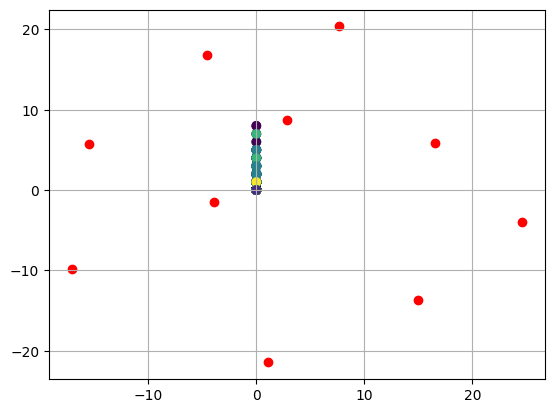

In [250]:
# 각 군집의 중심점 좌표, 군집 label
centors = kmeans.cluster_centers_ # 중심점 좌표
labels = kmeans.labels_           # X의 군집된 결과

# 이 결과를 토대로 눈으로 시각화
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1], c=labels) # 군집된 데이터 시각화
plt.scatter(centors[:, 0],centors[:,1],c="red")
plt.grid(True)
plt.show()

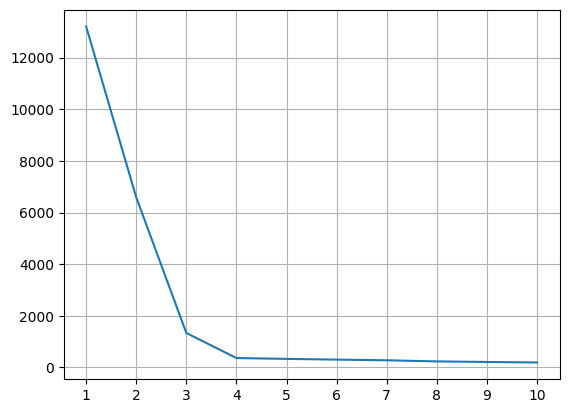

In [59]:
# 엘보우 방법을 이용한 최적의 k 찾기
k_range = range(1, 11)

inertia_list = []

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_) # 군집 내 데이터들과 중심점 사이의 거리

plt.plot(k_range, inertia_list)
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [ ]:
https://github.com/nayeho/robot/raw/refs/heads/main/Mall_Customers.csv

In [61]:
# 실제 data가지고 군집
# 쇼핑몰 고객 데이터

import pandas as pd

df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


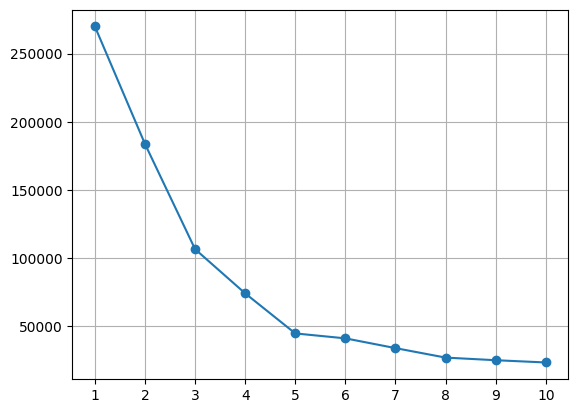

In [74]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# 우리가 사용할 머신 러닝 input은 대개 ndarray
X = X.values

# 우리의 목표
# X를 k개로 군집화

# 엘보우 방법을 사용해보자 : 그래프 확인 결과 k는 5가 적당
k_range = range(1, 11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)

plt.plot(k_range, inertia_list, marker = "o")
plt.grid(True)
plt.xticks(k_range)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

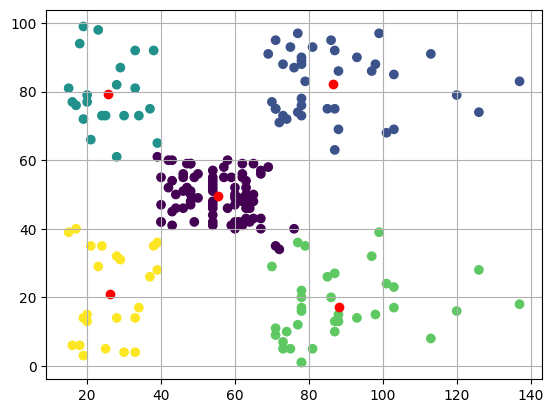

In [82]:
# 우리는 엘보우 방법으로 군집 K 5 확인
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
kmeans.fit(X)
centors = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centors[:, 0], centors[:, 1], c="red")
plt.grid(True)
plt.show

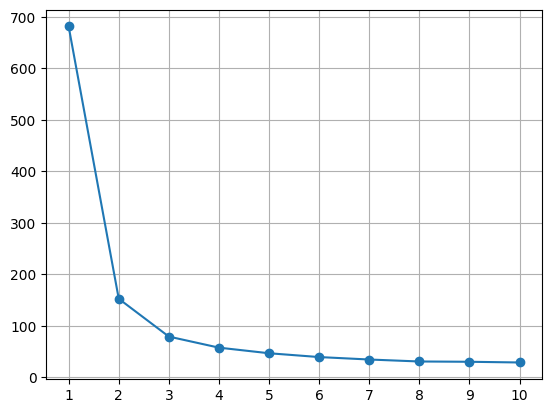

In [94]:
# 지도 학습 - 분류
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset

# 비지도 학습 - 군집
# 정답 필요 없음

X = iris_dataset.data

k_range = range(1, 11)
inertia_list = []

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)

plt.plot(k_range, inertia_list, marker="o")
plt.grid(True)
plt.xticks(k_range)
plt.show()

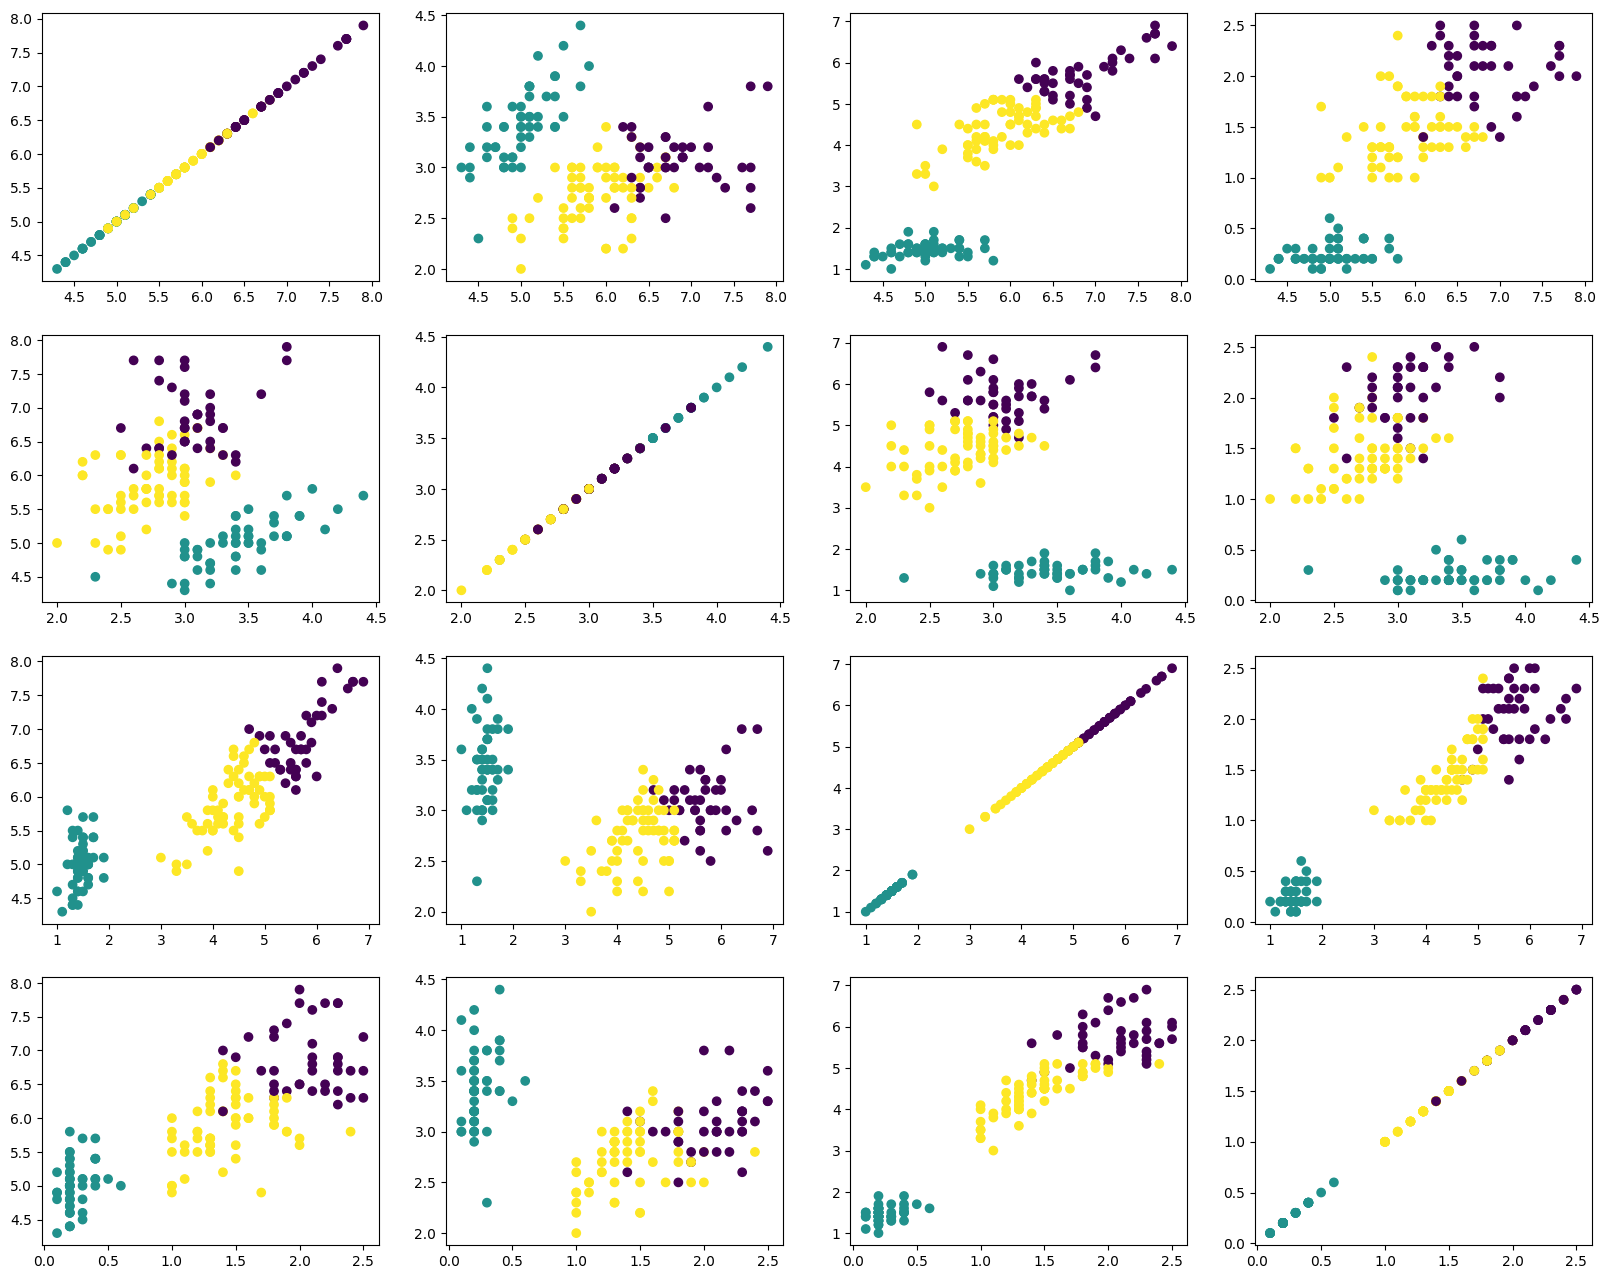

In [101]:
# 엘보우 방법을 통해 k가 3을 확인하였다

kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(X)

centors = kmeans.cluster_centers_
labels = kmeans.labels_

fig, axis = plt.subplots(4, 4, figsize = (20,16))

for i in range(4):
    for j in range(4):
        axis[i, j].scatter(X[:,i], X[:,j], c=labels)



plt.show()

In [102]:
# 다른 형태의 군집되어 있는 데이터를 학습
# 밀도 기반 알고리즘
# DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
# 밀집되어 있는 영역 기반 군집 알고리즘
# 핵심 개념
# eps(epsilon) : 개별 데이터를 중심으로 하는 원의 반경
# min_samples : 하나의 군집으로 인정받기 위한 최소 샘플 수

<function matplotlib.pyplot.show(close=None, block=None)>

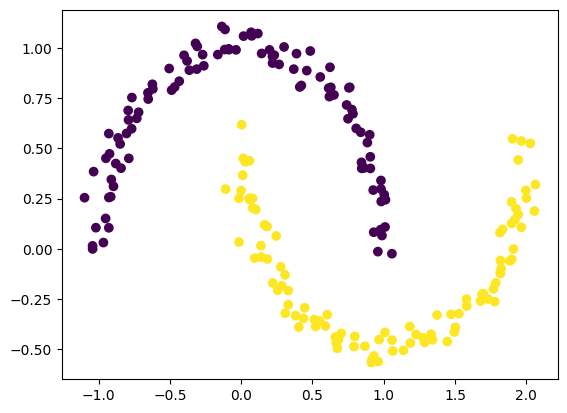

In [107]:
from sklearn.datasets import make_moons # 초승달 모양 데이터 생성
from sklearn.cluster import DBSCAN


X,y = make_moons(n_samples=200, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)
clusters

plt.scatter(X[:, 0],X[:, 1], c=clusters)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

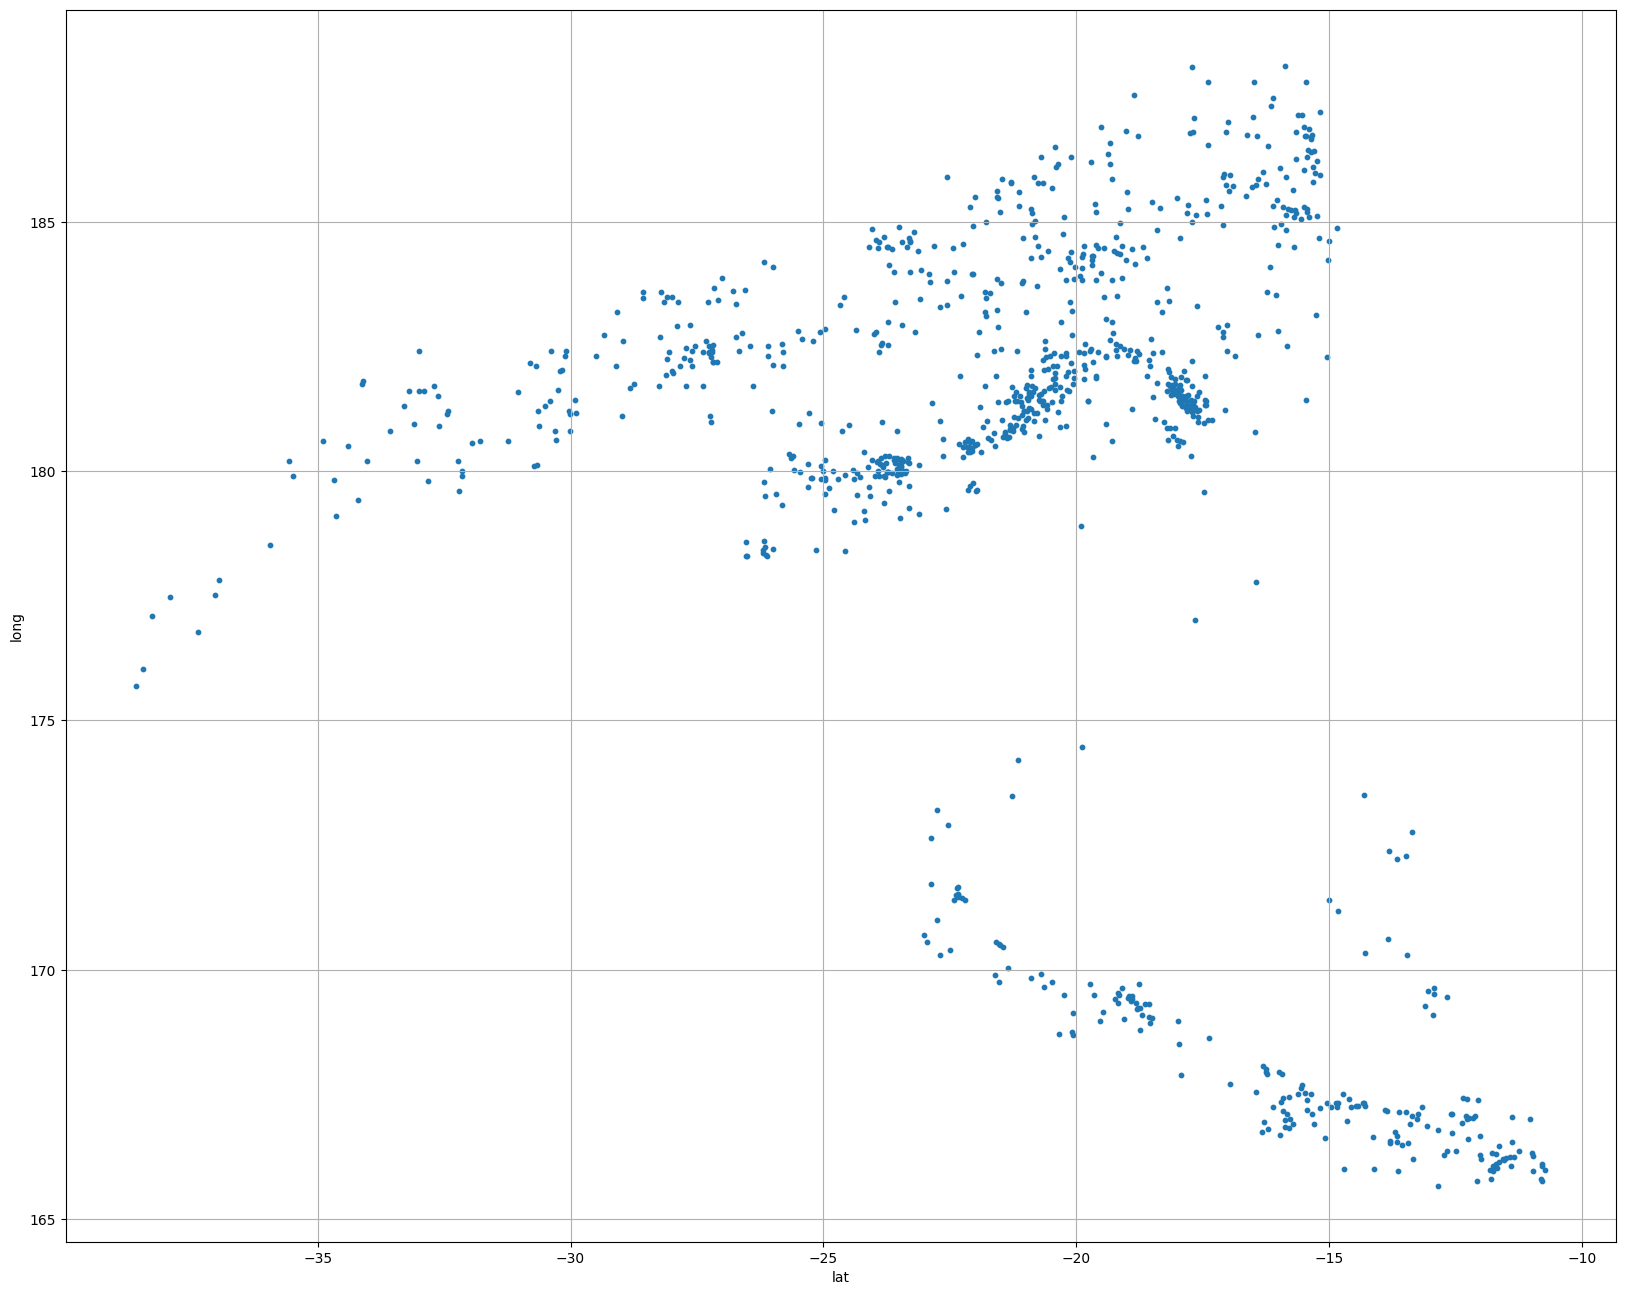

In [122]:
# 실제 지진 데이터를 DBSCAN 활용해서 군집

df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/quakes.csv")
X = df[["lat", "long"]]
X = X.values

# 그렇다면, 군집하기 전에 시각화를 한 번 해볼까?

plt.figure(figsize=(20, 16))
plt.grid(True)
plt.xlabel("lat")
plt.ylabel("long")
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.show

# DBSCAN 사용 시 장점 : 군집 개수 정하지 않아도 됨.
# 단점 : eps를 계산 해야함

<function matplotlib.pyplot.show(close=None, block=None)>

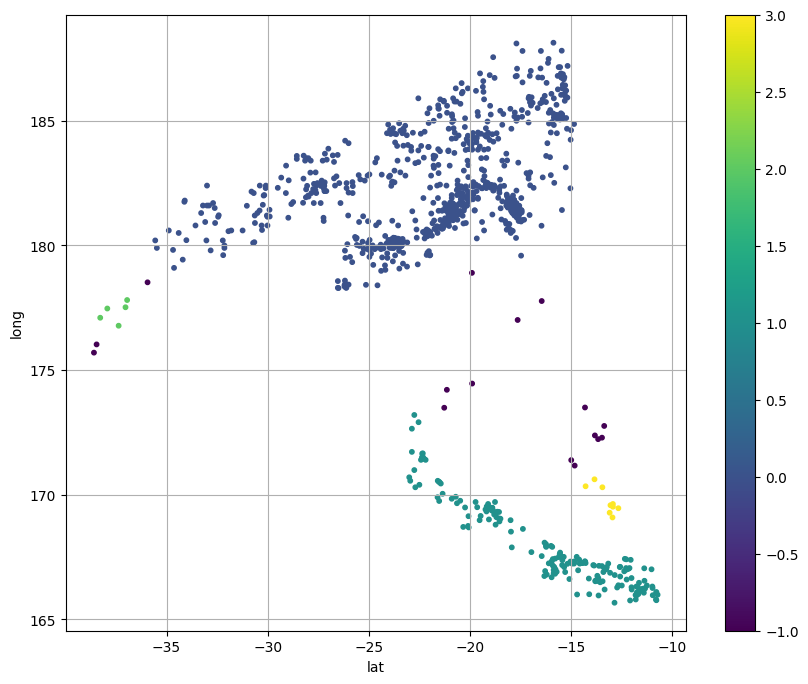

In [139]:
# eps 1.0으로 두고 출발하자
# min_sampes = 5

dbscan = DBSCAN(eps=1.2, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1],c=clusters,s=10, cmap = "viridis")
plt.xlabel("lat")
plt.ylabel("long")
plt.colorbar()
plt.grid(True)
plt.show

In [129]:
# -1은 노이즈

set(clusters) # -1을 제외한 군집 개수 : 4개

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

<function matplotlib.pyplot.show(close=None, block=None)>

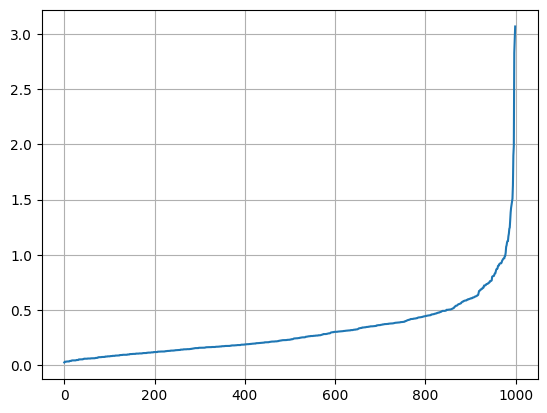

In [137]:
from sklearn.neighbors import NearestNeighbors

# eps 찾기
# K-distance 알고리즘 활용
# eps, min_samples
# 1) min_samples은 feature 개수 X 2 WJDEHFH TJFWJD
# 만약, min_samples를 5로 설정했다면
# 각 점(데이터 포인트)에서 4개의 점 까지 거리 계산
k = 4
neighbor = NearestNeighbors(n_neighbors=k).fit(X)
distance, indices = neighbor.kneighbors(X)
# 거리를 가지고 그래프
# 그리기 전에 정렬
import numpy as np

dist_sorted = np.sort(distance[:, k -1], axis=0)

plt.plot(dist_sorted)
plt.grid(True)
plt.show

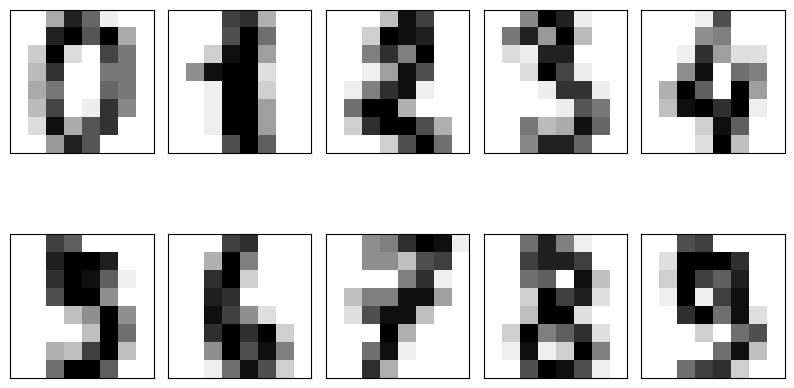

In [164]:
# 차원 축소
from sklearn.datasets import load_digits

digits = load_digits()

fig, axis = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={"xticks":[], "yticks":[]},
                         gridspec_kw=dict(hspace=0.4,wspace=0.1))
count = 0
for i in range(2):
    for j in range(5):
        axis[i, j].imshow(digits["images"][count], cmap = "binary", interpolation="nearest")
        count += 1
plt.show()

# image = digits["images"][5]

# # 시각화
# # 도대체 어떤 이미지 인지?
# plt.figure(figsize=(5, 5))
# plt.imshow(image, cmap="binary", interpolation="nearest") #픽셀 선명하게
# plt.show()


In [159]:
# 각 데이터가 64개의 feature를 가지고 있다
# 64개중에서 어떤 feature가 중요한가?
# feature를 줄이는 작업 : 차원 축소
# 조건 : 줄여진 feature들이 원래의 data를 잘 표현해야 함

In [205]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print("원본 데이터의 차원 : ", X.shape)
# 차원 축소 후 원래의 데이터를 얼마나 잘 표현

# 차원 축소
# 첫 번째 모델 : 주 성분 분석(PCA, Principal Component Analysis)
# - 원리 : 데이터의 분산이 가장 큰 방향을 새로운 축(주성분)으로 설정하여
#         원본 데이터를 투영

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 64 -> 2
X_pca = pca.fit_transform(X)
print("축소된 데이터의 차원 : ", X_pca.shape)

print("축소된 데이터의 주성분이 원본을 얼마나 표현하는지")
print(round(sum(pca.explained_variance_ratio_),2))
# 0.29가 의미하는 내용
# 64차원을 2차원으로 축소했는데
# 해당 2차원 데이터가 원본을 29%나 표현하고 있다


원본 데이터의 차원 :  (1797, 64)
축소된 데이터의 차원 :  (1797, 2)
축소된 데이터의 주성분이 원본을 얼마나 표현하는지
0.29


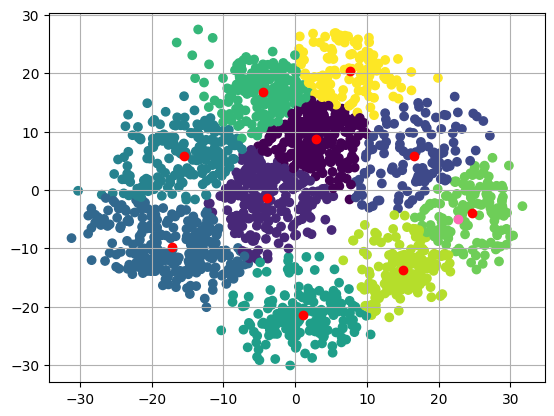

In [206]:
# 군집 사용해서 K-Means
# 10개로 시각화 시켜주실 수 있나요
# n_init : 중심점 이동하는 횟수
X_pca

kmeans = KMeans(n_clusters=10, n_init="auto", random_state=42)
kmeans.fit(X_pca)
centors = kmeans.cluster_centers_
labels = kmeans.labels_

# 만약, 새로운 데이터가 들어 왔다


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.scatter(centors[:, 0], centors[:, 1], c="red")
plt.scatter(X_pca[100][0], X_pca[100][1], c="hotpink")
plt.grid(True)
plt.show()

In [207]:
# 1) 군집
# 2) 차원 축소
# 3) 연관 규칙 분석 (Association Rule Mining)
# - 특정 feature들간에 규칙을 찾아내는 기법
# 여러분들이 가게를 운영
# 우유가 안 팔림 ->
# 카스테라 빵을 사는 사람은 우유를 살 확률이 일반 소비자보다 3배 높다
# 카스테라 + 우유 같이 진열

In [209]:
# 1. 전처리된 장바구니 데이터 (총 10개의 거래)
dataset = [
    ['우유', '계란', '빵'],
    ['우유', '기저귀', '맥주', '감자칩'],
    ['계란', '빵', '주스'],
    ['우유', '기저귀', '맥주', '콜라'],
    ['빵', '계란', '우유'],
    ['기저귀', '맥주', '주스'],
    ['빵', '콜라'],
    ['우유', '계란', '빵', '감자칩'],
    ['기저귀', '맥주'],
    ['우유', '빵']
]

In [218]:
# 문자열 -> 범주형 데이터
# DataFrame
# 데이터프레임명.info()
# int64, object, bool
# 타이타닉 Sex -> male, female -> 상관관계 분석 (X)
# 수치형 데이터가 아니기 때문에

# 간단한 전처리
# 범주형 데이터를 어떻게 전처리 할 것인가?
# 1) 레이블 인코딩

item_list = []
for data in dataset:
    for d in data:
        item_list.append(d)
item_list = list(set(item_list))
item_list.sort()
item_list
item_dict = {}

for index, item in enumerate(item_list):
    item_dict[item] = index

# 인코딩 결과
encoded_list = []
for data in dataset:
    temp = []
    for d in data:
        temp.append(item_dict[d])
    encoded_list.append(temp)
encoded_list



[[5, 1, 4],
 [5, 2, 3, 0],
 [1, 4, 6],
 [5, 2, 3, 7],
 [4, 1, 5],
 [2, 3, 6],
 [4, 7],
 [5, 1, 4, 0],
 [2, 3],
 [5, 4]]

In [ ]:
dataset

In [222]:
# 레이블 인코딩 -> 함수
from sklearn.preprocessing import LabelEncoder



# 그 전에 dataset을 df로 변환
items = []
for data in dataset:
    for d in data:
        items.append(d)
items = list(set(items))
df = pd.DataFrame({"item" : items})

le = LabelEncoder()
df["encoded_label"] = le.fit_transform(df["item"])


,item,encoded_label
0,감자칩,0
1,맥주,3
2,기저귀,2
3,계란,1
4,빵,4
5,주스,6
6,콜라,7
7,우유,5


In [229]:

# 원-핫 인코딩
# 데이터들을 쭉 나열
# 우유, 계란, 빵, 기저귀 ,맥주, 감자칩
# True, True, True, False, False, False
# 함수 사용하지 않고 직접 One-Hot Encoding

items = []

for data in dataset:
    for d in data:
        items.append(d)
items = list(set(items))
items.sort()
item_dict = {}
for index, item in enumerate(items):
    item_dict[item] = index
item_dict

encoded_list = []

for data in dataset:
    temp = [0] * len(items)
    for d in data:
        # temp = [0, 0, 0, 0, 0, 0, 0, 0]
        # d : 기저귀
        temp[item_dict[d]] = 1
    encoded_list.append(temp)

df = pd.DataFrame(encoded_list, columns = items)
df.astype(bool)

,감자칩,계란,기저귀,맥주,빵,우유,주스,콜라
0,False,True,False,False,True,True,False,False
1,True,False,True,True,False,True,False,False
2,False,True,False,False,True,False,True,False
3,False,False,True,True,False,True,False,True
4,False,True,False,False,True,True,False,False
5,False,False,True,True,False,False,True,False
6,False,False,False,False,True,False,False,True
7,True,True,False,False,True,True,False,False
8,False,False,True,True,False,False,False,False
9,False,False,False,False,True,True,False,False


In [239]:
# 좀 더 간편하게 One-Hot Encoding
!pip install mlxtend

In [244]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te.fit_transform(dataset)
temp = te.fit(dataset).transform(dataset)
df = pd.DataFrame(temp, columns = items)

# 연관 규칙 분석
from mlxtend.frequent_patterns import apriori

# support (지지도)
# 전체 데이터 중 해당 값이 포함될 확률
freq = apriori(df, min_support=0.2, use_colnames=True)
freq

,support,itemsets
0,0.2,(감자칩)
1,0.4,(계란)
2,0.4,(기저귀)
3,0.4,(맥주)
4,0.6,(빵)
5,0.6,(우유)
6,0.2,(주스)
7,0.2,(콜라)
8,0.2,"(우유, 감자칩)"
9,0.4,"(계란, 빵)"


In [249]:
# 신뢰도
# 우유를 4명이 샀다
# 그 사람들 중 빵을 3명이 샀으면
# 우유 -> 빵 신뢰도 0.75
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq, min_threshold=0.6) # 신뢰도가 60% 이상
rules.sort_values(by="lift",ascending=False)
# lift : 우연히 2개의 물품을 동시에 샀다면 lift가 낮다
# 실제 연관성이 있으면 lift가 높다
# 기저귀 -> 맥주 lift가 2.5
# 기저귀를 산 사람은 기저귀를 사지 않은 사람보다 맥주를 구입할 확률이 250%



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(기저귀),(맥주),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
5,(맥주),(기저귀),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
13,"(우유, 맥주)",(기저귀),0.2,0.4,0.2,1.000000,2.500000,1.0,0.12,inf,0.750000,0.500000,1.000000,0.750000
12,"(기저귀, 우유)",(맥주),0.2,0.4,0.2,1.000000,2.500000,1.0,0.12,inf,0.750000,0.500000,1.000000,0.750000
11,(계란),"(우유, 빵)",0.4,0.4,0.3,0.750000,1.875000,1.0,0.14,2.4,0.777778,0.600000,0.583333,0.750000
9,"(우유, 빵)",(계란),0.4,0.4,0.3,0.750000,1.875000,1.0,0.14,2.4,0.777778,0.600000,0.583333,0.750000
8,"(우유, 계란)",(빵),0.3,0.6,0.3,1.000000,1.666667,1.0,0.12,inf,0.571429,0.500000,1.000000,0.750000
2,(빵),(계란),0.6,0.4,0.4,0.666667,1.666667,1.0,0.16,1.8,1.000000,0.666667,0.444444,0.833333
0,(감자칩),(우유),0.2,0.6,0.2,1.000000,1.666667,1.0,0.08,inf,0.500000,0.333333,1.000000,0.666667
1,(계란),(빵),0.4,0.6,0.4,1.000000,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000000,0.833333


In [237]:
# 함수를 활용해서 One-Hot Encoding

from sklearn.preprocessing import OneHotEncoder
one_hot_e = OneHotEncoder(sparse_output=False) #numpy array로 변환
result = one_hot_e.fit_transform(encoded_list)
print(result)

[[1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]]


In [272]:
# 실제 데이터를 통해 분석

url = "https://github.com/nayeho/robot/raw/refs/heads/main/groceries.csv"

# url에서 실제 데이터를 직접 불러오기 위해
import urllib.request as urq

groceries = []
with urq.urlopen(url) as file:
    for row in file:

        row_list = row.decode("utf-8").strip().split(",")
        groceries.append(row_list)
        
groceries[:3]

# 1) One-Hot Encoding 통해서 전처리

te = TransactionEncoder()
arr = te.fit(groceries).transform(groceries)

df = pd.DataFrame(arr, columns = te.columns_)

# 2) 연관 규칙 분석 지지도, 신뢰도, lift
freq = apriori(df, min_support=0.01, use_colnames=True)
freq.sort_values(by = "support", ascending=False)

# 3) 신뢰도 계산
rules = association_rules(freq, metric="lift", min_threshold=1.5)
rules.sort_values(by="confidence", ascending=False)

# 1) support
# citrus fruit, root vegetables를 구매한 사람은 0.010371 (1%)
# other vegetables 를 구매한 사람은 0.193493 (19%)
# 2) confidence
# citrus fruit, root vegetables를 구매한 사람중 other vegetables를 구매할 확률은 0.586207 (58%)
# 3) lift
# citrus fruit, root vegetables를 구매한 사람은 일반사람보다 other vegetables를 구매할 확률이 3배 더 높다.
# 4) 결론
# 같이 두자

# 시장 조사
# 구매 데이터
# support, confidence, lift 조사해서 설득하는 근거
# 마켓팅

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
222,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,1.0,0.006948,1.949059,0.681990,0.051646,0.486932,0.319903
288,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,1.0,0.008231,1.941244,0.683367,0.060835,0.484867,0.324062
240,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,1.0,0.005649,1.782567,0.571107,0.038313,0.439011,0.310874
218,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,1.0,0.006371,1.745992,0.565878,0.043512,0.427260,0.309285
358,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,1.0,0.006620,1.731553,0.563627,0.045350,0.422484,0.308502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,(whole milk),"(fruit/vegetable juice, other vegetables)",0.255516,0.021047,0.010473,0.040987,1.947371,1.0,0.005095,1.020792,0.653456,0.039358,0.020368,0.269286
237,(whole milk),"(yogurt, citrus fruit)",0.255516,0.021657,0.010269,0.040191,1.855768,1.0,0.004736,1.019310,0.619408,0.038476,0.018944,0.257185
274,(whole milk),"(pork, other vegetables)",0.255516,0.021657,0.010168,0.039793,1.837394,1.0,0.004634,1.018887,0.612170,0.038081,0.018537,0.254638
126,(whole milk),(hard cheese),0.255516,0.024504,0.010066,0.039395,1.607682,1.0,0.003805,1.015502,0.507716,0.037288,0.015265,0.225092


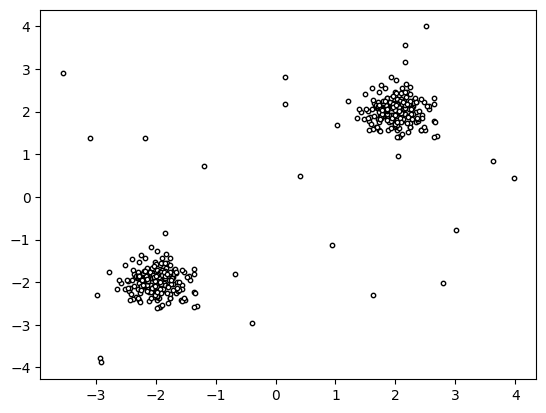

In [282]:
# 이상 탐지
# 정상 데이터와 다른 데이터를 구분
# 보안, 안전 분야에서 각광
# Isolation Forest 고립된 숲

from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# 실습용 데이터 만들기
np.random.seed(42) # 해당 로직에서 랜덤 시드 고정

# 정상 데이터 200개 만들기
X_normal = np.random.randn(200, 2) * 0.3
X_normal = np.r_[X_normal + 2, X_normal - 2]
X_normal.shape

# 이상 데이터 20개 만들기
X_outlier = np.random.uniform(low=-4, high=4, size = (20,2))
X_outlier # -4 ~ 4 범위를 가진 20개의 데이터 (2개의 feature)

X = np.r_[X_normal, X_outlier]
X.shape # 정상 200 x 2 + 이상 20개

# 이상 탐지 이전 시각화
plt.scatter(X[:, 0], X[:, 1], s = 10, c="white", edgecolors="black")
plt.show()

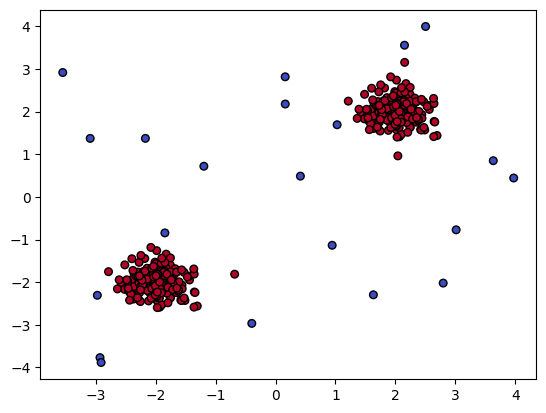

In [293]:
# 고립된 숲
# contamination 이상치 추정  (비우면 자동으로 진행)
isf = IsolationForest(contamination=0.05, random_state=42)
y_pred = isf.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = "coolwarm", s = 30, edgecolors="black")
plt.show()

In [300]:
!curl -L https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv -o creditcard.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2  143M    2 3662k    0     0  4109k      0  0:00:35 --:--:--  0:00:35 4110k
  9  143M    9 14.2M    0     0  7705k      0  0:00:19  0:00:01  0:00:18 7707k
 16  143M   16 24.2M    0     0  8587k      0  0:00:17  0:00:02  0:00:15 8588k
 24  143M   24 34.5M    0     0  9086k      0  0:00:16  0:00:03  0:00:13 9087k
 30  143M   30 44.3M    0     0  9286k      0  0:00:15  0:00:04  0:00:11 9286k
 38  143M   38 54.8M    0     0  9536k      0  0:00:15  0:00:05  0:00:10 10.2M
 45  143M   45 65.1M    0     0  9683k      0  0:00:15  0:00:06  0:00:09 10.1M
 52  143M   52 76.1M    0     0  9882k      0  0:00:14  0:00:07  0:00:07 10.3M
 59  143M   59 85.6M    0     0  9866k      0  0:00:14  0:00:08  0:00:06 10.2M
 65  143M   65 94.4M    0     0  9776k      0  0:00

In [302]:
# 카드 거래 명세
 
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


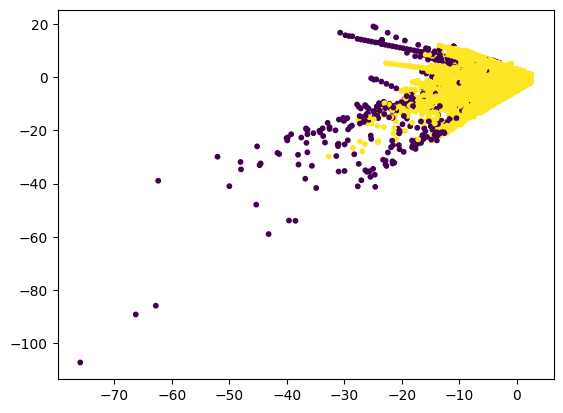

In [318]:
# df.head() # V1 ~ V28 개인정보 보호를 위해 마스킹 처리 된 feature
# class : 0 -> 정상
# class : 1 -> 사기 거래
df["Class"].value_counts()

# Time, Amount를 전처리-스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df["Scaled_Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Scaled_Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))
X = df.drop(["Time", "Amount", "Class"], axis = 1)
X.head()

# 실제 사기 비율 : 0.17%
fraud_ratio = df["Class"].value_counts(normalize=True)[1]

isf = IsolationForest(contamination=fraud_ratio, random_state=42)
y_pred = isf.fit_predict(X)
y_pred

# feature가 30개 -> 2개로 차원 축소
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10)
plt.show()

In [ ]:
# 전처리


In [374]:
test = pd.read_csv("test.csv")
test["Survived"] = test["Sex"].apply(lambda x : 1 if x == "female" else 0)

test = test[["PassengerId", "Survived"]]

test.to_csv("test6.csv", index = None)

In [373]:
# train.csv를 가지고 오자

import pandas as pd
train = pd.read_csv("train.csv")
# 결측치 확인 용 info
# train.info()

# 우리가 처리해야 할 결측치 2개 컬럼("Age", "Cabin", "Embarked")

# 결측치 개수 확인
print("초기 결측치 개수 :\n", train.isnull().sum())

초기 결측치 개수 :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [375]:
# Age컬럼의 결측치를 어떻게 처리할건지

# 1) mean으로 대체하자
# 2) median으로 대체하자
# 3) 최빈값으로 대체하자

mean_age = train["Age"].mean()
train["Age"].fillna(mean_age, inplace=True)

train["Age"].describe()


C:\Users\KCCISTC\AppData\Local\Temp\ipykernel_18028\3867153336.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(mean_age, inplace=True)


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [376]:
# "Cabin"은 결측치가 너무 많다
# 모델 학습에 "Cabin"컬럼은 제외하자

train = train.drop("Cabin", axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [377]:
# "Embarked" 2개 결측치 처리하자
train["Embarked"].value_counts() # S가 가장 많다
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [396]:
train.isnull().sum() # 결측치 해결 완료
# 범주형 -> True, False 전처리
# One-hOT Encoding (Sex, Embarked)

sex_list = []

# 좀 더 간편한 인코딩
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
# te.fit(train["Sex"]).fit_transform(train[["Sex"]].values)
train["Female"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 1]
train["Male"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 0]
train["C"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 0]
train["Q"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 1]
train["S"] = te.fit(train["Embarked"]).fit_transform(train[["Embarked"]].values)[:, 2]
return train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Male,Female,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,False,True,False,False


In [397]:
# 의사 결정 트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# train에서 필요 없는 컬럼 drop
train_d = train.drop(["PassengerId", "Name", "Ticket", "Sex", "Embarked"], axis = 1)
X = train_d.iloc[ :, 1 :]
y = train_d.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
d_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy =accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.7085201793721974


In [41]:
df_test = titanic_pp("test.csv")
df_test.head()

# test.csv 의 X
test_X = df_test.iloc[: , 1 : ]
test_y = knn.predict(test_X)
test_y = d_tree.predict(test_X)

# test_X_scaled = scaler.transform(test_X)
# test_y = svm.predict(test_X_scaled)

df_test["Survived"] = test_y
df_test.head()
df_test = df_test[["PassengerId", "Survived"]]
df_test.head()
df_test.to_csv("submit2.csv", index=None)

In [34]:
# train.csv 혹은 test.csv -> 전처리
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder # One-Hot Encoding 용

def titanic_pp(file):
    # 1) csv 읽기 -> df로 변환
    df = pd.read_csv(file)
    
    # 2) Age 결측치 mean으로 대입
    age_mean = df["Age"].mean()
    df["Age"] = df["Age"].fillna(age_mean)
    
    # 3) Cavin 결측치 -> drop
    df = df.drop("Cabin", axis = 1)
    
    # 4) Embarked 결측치 2개 -> 최빈값 S로 대체
    df["Embarked"] = df["Embarked"].fillna("S")
    
    # 5) Fare 요금 분석 결과 drop
    df = df.drop("Fare", axis = 1)
    df = df.drop("Name", axis = 1)
    df = df.drop("Ticket", axis = 1)
    
    # 6) Sex, Embarked -> One-Hot Encoding
    te = TransactionEncoder()
    df["Female"] = te.fit(df["Sex"]).fit_transform(df[["Sex"]].values)[:, 0]
    df["Male"] = te.fit(df["Sex"]).fit_transform(df[["Sex"]].values)[:, 1]
    # C, Q, S
    df["C"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:, 0]
    df["Q"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:, 1]
    df["S"] = te.fit(df["Embarked"]).fit_transform(df[["Embarked"]].values)[:, 2]

    df = df.drop("Embarked", axis = 1)
    df = df.drop("Sex", axis = 1)
    return df


In [40]:
df_train = titanic_pp("train.csv")
df_train.head()

# 원하는 모델 사용해서 학습
# K-NN, Decision Trr, SVM

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

df_train = df_train.drop("PassengerId", axis = 1)

X = df_train.iloc[ :, 1 : ]
y = df_train.iloc[ : , 0]
# Knn
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train, y_train)

# Decision Tree
d_tree = DecisionTreeClassifier(max_depth=3, random_state = 42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

# SVM
# 스케일링
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# svm = SVC(kernel="rbf", C=1.0, random_state=42)
# svm.fit(X_train_scaled, y_train)
# X_test_scaled = scaler.transform(X_test)
# y_pred = svm.predict(X_test_scaled)

# y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.8026905829596412


In [ ]:

# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
svm = SVC(kernel="rbf", C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = svm.predict(X_test_scaled)

accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

In [55]:
# 로지스틱 회귀 (Logistic Regression) -> 분류 모델
# 회귀 (연속적인 수치 -> 예측)
# Linear Regression
# y = W1x1 + W2x2 + ... + b
# y = 자체가 수치
# y를 우리가 원하는 범위 0 ~ 1로 변환 (시그모이드 : 로지스틱)
# 변환된 값이 0.85 -> 0.5 이상이라 판단해서 -> True
# 변환된 값이 0.3 -> 0.5 미만 -> False
# 회귀 자체를 분류처럼 사용할 수 있게 해주는 알고리즘

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logistic = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000)
df_train = titanic_pp("train.csv")
df_train = df_train.drop("PassengerId",axis = 1)

X = df_train.iloc[: , 1: ]
y = df_train.iloc[: , 0 ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.8071748878923767


In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Female,Male,C,Q,S
0,1,0,3,22.0,1,0,False,True,False,False,True
1,2,1,1,38.0,1,0,True,False,True,False,False
2,3,1,3,26.0,0,0,True,False,False,False,True
3,4,1,1,35.0,1,0,True,False,False,False,True
4,5,0,3,35.0,0,0,False,True,False,False,True


In [64]:
df_train = titanic_pp("train.csv")
df_train.head()

# test.csv의 X
X = df_train.iloc[ :, 1 : ]
y = r_forest.predict(test_X)
df_test["Survived"] = test_y
df_test = df_test[["PassengerId", "Survived"]]
df_test.to_csv("submit5.csv", index = None)

In [62]:
# 앙상블 (Ensemble)
# 여러 개의 약한 모델(기법)을 결합하여 강력한 성능을 내는 모델
# 배깅 (Bagging) : 데이터를 여러 번 샘플링을 하여 좋은 결과를 선택
# 결정 트리에서 일부 Feature만 선택하여 결과를 보고 좋은면 채택 -> 랜덤 포레스트
# 부스팅(Boosting) : 이전 모델의 오류를 다음 모델에서 보완
# 정답률 0.6 -> 다음에 그 Feature는 안 써야지


# 5) 랜덤 포레스트
df_train = titanic_pp("train.csv")
df_train = df_train.drop("PassengerId", axis = 1)
X = df_train.iloc[ : , 1 : ]
y = df_train.iloc[ :, 0]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(n_estimators=100, random_state = 42)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy}")

정확도 : 0.7982062780269058


In [67]:
# 평가지표
#----------------
# 암x TN FP
# 암o FN TP
#    X(n)O(p)
#-----------------
# A 정확도 : (TP + TN) / 전체

# R 재현율(Recall) : TP / (TP + FN) _  맞춘거 / 맞추려고한것들중에 
# : 암환자를 판별할 확률

# P 정밀도(Precision) = TP / (TP + FP) _ 맞춘거 / 예측한것들중에
# : 내가 암환자라고 대답한 사람 중 실제 암환자

# F1 score가 1에 가까울 수록 좋은 모델 
# : 재현율과 정밀도의 조화 평균
# : 산술평균과 달리 조화평균은 어느 한 쪽이 0에 가까울수록 조화평균은 급격히 낮아지는 경향

정확도 : 0.7982062780269058
재현율 : 0.6966292134831461
정밀도 : 0.775
f1 score : 0.7337278106508875
오차행렬 : 
 [[116  18]
 [ 27  62]]


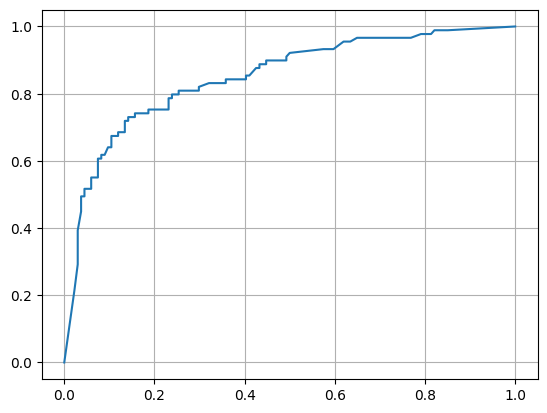

auc score : 0.8495304376991447


In [82]:
# ROC 곡선을 그려보자
# ROC(Receiver Operating Characteristic Curve)
# 암환자 관련
# TP : 암환자라고 했는데 맞음 (암환자)
# FP : 암환자라고 했는데 아님 (정상인)
# FN : 암환자 아니라고 했는데 틀림 (암환자)
# FP : 암환자 아니라고 했는데 맞음 (정상인)

# FP (실제 정상인을 암환자라고 잘못 판단)
# TP (실제 암환자를 예측함) : 재현율(Recall)

# FP : x
# TP : y
# y = f(x) 그래프 -> ROC

# 마지막 랜덤포레스트 -> F1 score 출력

from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

# 마지막 랜덤포레스트 -> 재현율 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 : {accuracy}")

recall = recall_score(y_test, y_pred)
print(f"재현율 : {recall}")

# 마지막 랜덤포레스트 -> 정밀도 출력
precision = precision_score(y_test, y_pred)
print(f"정밀도 : {precision}")

f1 = f1_score(y_test, y_pred)
print(f"f1 score : {f1}")


confusion = confusion_matrix(y_test, y_pred) 
print(f"오차행렬 : \n",confusion)

#----------------------------------
# TN  FP   
# FN  TP
#----------------------------------

from sklearn.metrics import roc_curve

# FP (실제 정상인을 암환자라고 잘못 판단)
# TP (실제 암환자를 예측함) : 재현율(Recall)

# FPR (Rate) : 정상인을 암환자라고 잘못 판단하지는 않았는가? 낮으면 좋음
# TPR (Rate) : 암환자를 잘 판단했는가? 높으면 좋음

y_proba = r_forest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.grid(True)
plt.show()

# ROC 곡선의 아래 영역의 넓이
# Area Under the Curve
# AUC가 1에 가까울수록 좋은 성능의 모델이다
# 0.8 이상만 되면 훌륭한 모델 (Execellent)
# 0.7 이상이면 좋은 모델 (Good)
# 0.5 -> Trash 모델 (동전 던져서 예측한거랑 동일)

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_proba)
print(f"auc score : {auc}")

In [83]:
# 타이타닉 train.csv를 불러와서
# 전처리
# 모델 학습
# score 확인

# pipeline
# 전처리 ~ 모델 학습 ~ score확인
# 전 과정을 하나의 파이프에 연결하여
# 코드의 가독성 향상, 유지보수 용이, 재사용성 높다

In [100]:
from sklearn.pipeline import Pipeline

import pandas as pd


df = pd.read_csv("train.csv")
# 필요 없는 column 삭제 후 X, y 대입
X = df.drop(["Survived", "Name", "Ticket", "Cabin", "PassengerId"], axis = 1)
y = df["Survived"]

# 전처리 프로세스
# 수치형 데이터 : Age, SibSp Parch, Fare
# 범주형 데이터 : Pclass, Sex, Embarked
numeric_list = ["Age", "SibSp", "Parch", "Fare"]
categories_list = ["Sex", "Embarked", "Pclass"]

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 만약 결측치가 존재한다면 평균으로 채움
pipe_mean_scaled = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean")),
               ("scaler", StandardScaler())
               ])

# 범주형 데이터 최빈 값 채운 이후에 One-Hot 인코딩
from sklearn.preprocessing import OneHotEncoder

pipe_freq_one_hot = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))  # 원-핫 인코딩 적용
])

# 우리가 만든 2개의 파이프를 원하는 컬럼에 적용하자
from sklearn.compose import ColumnTransformer

Col_transf = ColumnTransformer(transformers=[
    ("num", pipe_mean_scaled, numeric_list),
    ("cat", pipe_freq_one_hot, categories_list)    
])

# 최종 연결(결합)
# KNN 쓰겠다
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

result_pipeline = Pipeline(steps=[
    ("preprocessor", Col_transf),
    ("classifier", RandomForestClassifier(
        random_state=42,
        max_depth = 10,
        n_estimators= 200,
        min_samples_leaf = 5
    ))
    # ("classifier", SVC(kernel="rbf", C=1.0, random_state=42))   
    # ("classifier", DecisionTreeClassifier(max_depth=3, random_state=42))   
    # ("classifier", KNeighborsClassifier(n_neighbors=3))    
])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
result_pipeline.fit(X_train, y_train)

print(f"75% train 학습 데이터 점수 : {result_pipeline.score(X_train, y_train)}")
print(f"25% test 학습 데이터 점수 : {result_pipeline.score(X_test, y_test)}")

75% train 학습 데이터 점수 : 0.8607784431137725
25% test 학습 데이터 점수 : 0.8161434977578476
